<h1 align="center"><strong>Bagging code</strong></h1>

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

##  **Bagging with Decision Tree**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_classification, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

In [2]:
iris = load_iris()
X = iris.data 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
dtree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(estimator=dtree, n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,50
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [4]:
y_pred = bagging_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging with Decision Tree: {accuracy:.2f}")

Accuracy of Bagging with Decision Tree: 1.00


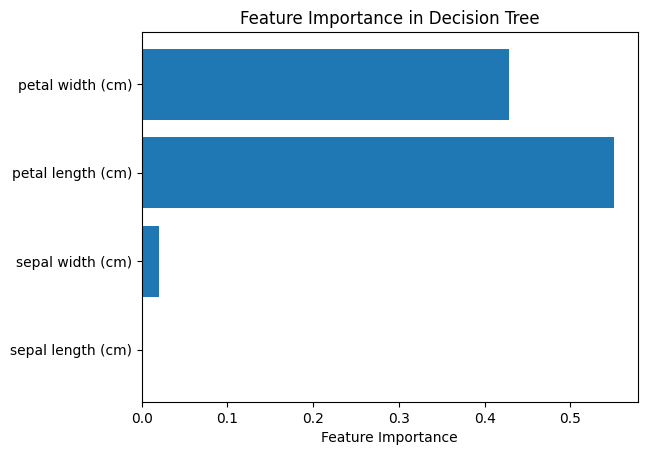

In [5]:
# Feature Importance from one Decision Tree in the Bagging Classifier (You can't use bagging_clf directly)
dtree_fitted = bagging_clf.estimators_[0]  # Access the first fitted DecisionTree from the bagging ensemble
feature_importances = dtree_fitted.feature_importances_

# Visualize feature importance (for Decision Tree)
features = iris.feature_names
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.show()

## **Bagging with K-Nearest Neighbors (KNN)**

In [7]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
bagging_clf_knn = BaggingClassifier(estimator=knn, n_estimators=50, random_state=42)
bagging_clf_knn.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,n_estimators,50
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


Accuracy of Bagging with KNN: 0.90


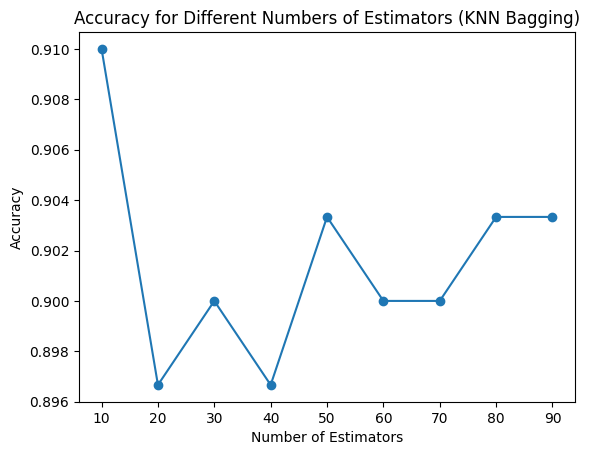

In [8]:
y_pred_knn = bagging_clf_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of Bagging with KNN: {accuracy_knn:.2f}")

n_estimators_range = range(10, 100, 10)
accuracy_values = []

for n in n_estimators_range:
    bagging_clf_knn = BaggingClassifier(estimator=knn, n_estimators=n, random_state=42)
    bagging_clf_knn.fit(X_train, y_train)
    y_pred_knn = bagging_clf_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    accuracy_values.append(accuracy)

plt.plot(n_estimators_range, accuracy_values, marker='o')
plt.title("Accuracy for Different Numbers of Estimators (KNN Bagging)")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.show()

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

<h1 align="center"><strong>Boosting code</strong></h1>

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

In [10]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Train set shape: {X_train_scaled.shape}')
print(f'Test  set shape: {X_test_scaled.shape}')

Train set shape: (398, 30)
Test  set shape: (171, 30)


## **AdaBoost Classifier**

AdaBoost Model Performance:
Accuracy: 0.9590643274853801
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        64
           1       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



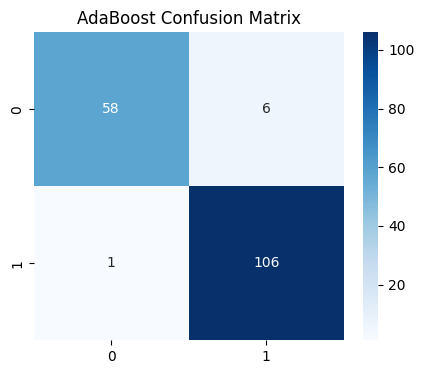

In [12]:
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada_clf.fit(X_train_scaled, y_train)

y_pred_ada = ada_clf.predict(X_test_scaled)

print("AdaBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost Confusion Matrix')
plt.show()

## **Gradient Boosting Classifier**

Gradient Boosting Model Performance:
Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



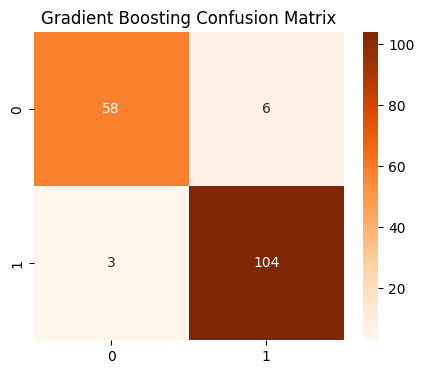

In [13]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train_scaled, y_train)

y_pred_gb = gb_clf.predict(X_test_scaled)

print("Gradient Boosting Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Oranges')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

## **XGBoost Classifier**

XGBoost Model Performance:
Accuracy: 0.9532163742690059
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



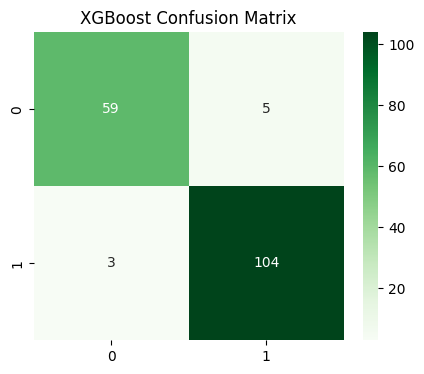

In [14]:
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_clf.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_clf.predict(X_test_scaled)

print("XGBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title('XGBoost Confusion Matrix')
plt.show()

## **Compare the Models**

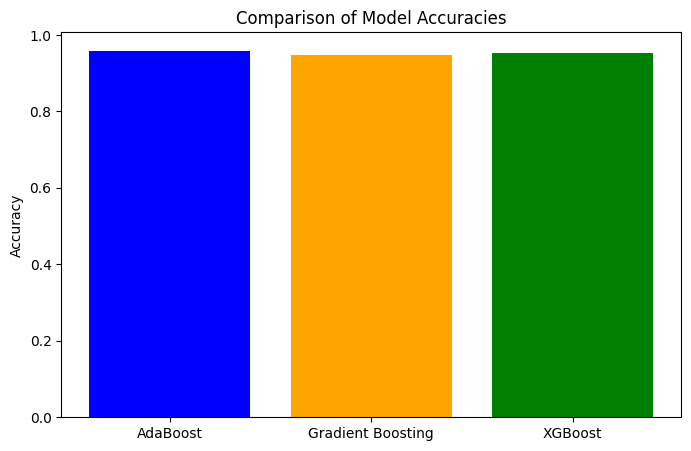

In [15]:
# Compare the accuracy of all models
models = ['AdaBoost', 'Gradient Boosting', 'XGBoost']
accuracies = [  accuracy_score(y_test, y_pred_ada),
                accuracy_score(y_test, y_pred_gb),
                accuracy_score(y_test, y_pred_xgb)]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

<h1 align="center"><strong>Boosting code More</strong></h1>

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

## **⚡ AdaBoost Hyperparameters**

| Hyperparameter     | Default                     | Role                                                             |
| ------------------ | --------------------------- | ---------------------------------------------------------------- |
| **estimator**      | `DecisionTree(max_depth=1)` | Weak learner (can be replaced).                                  |
| **n\_estimators**  | `50`                        | Number of weak learners. More → better (to a point).             |
| **learning\_rate** | `1.0`                       | Scales each learner’s contribution. Lower → need more learners.  |
| **algorithm**      | `'SAMME.R'`                 | Boosting type: `'SAMME'` (discrete) / `'SAMME.R'` (probability). |
| **random\_state**  | `None`                      | Controls randomness → reproducibility.                           |

In [31]:
import pandas as pd
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [19]:
X, y = make_classification(n_samples=100, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a weak learner
weak_learner = DecisionTreeClassifier(max_depth=1)

ada = AdaBoostClassifier(estimator=weak_learner, n_estimators=50, learning_rate=1.0, random_state=42)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best Score: 0.9428571428571428


## **🌲 Gradient Boosting Hyperparameters**

| Hyperparameter          | Default | Role                                                                            |
| ----------------------- | ------- | ------------------------------------------------------------------------------- |
| **n\_estimators**       | `100`   | Number of boosting stages (trees). More → better accuracy, risk of overfitting. |
| **learning\_rate**      | `0.1`   | Shrinks each tree’s contribution. Lower → need more trees.                      |
| **max\_depth**          | `3`     | Maximum depth of each tree (controls model complexity).                         |
| **min\_samples\_split** | `2`     | Minimum samples to split a node.                                                |
| **min\_samples\_leaf**  | `1`     | Minimum samples required in a leaf node.                                        |
| **subsample**           | `1.0`   | Fraction of samples used per tree. `<1.0` → prevents overfitting.               |


In [29]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
gbc = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_gbc = grid_search.best_estimator_
best_gbc.fit(X_train, y_train)

# Predict and evaluate
y_pred = best_gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

